In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = '/content/Amazon Sale Report.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
df.drop(columns=['New', 'PendingS'], inplace=True)

# Handle missing values (example for "Amount")
df['Amount'].fillna(df['Amount'].median(), inplace=True)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing or inconsistent 'Date'
df = df[df['Date'].notnull()]

# Display cleaned data information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              128976 non-null  float64       
 13  ship-city           128941 no

<ipython-input-2-22ee382b9d5d>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].median(), inplace=True)
<ipython-input-2-22ee382b9d5d>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
# Save the cleaned data to a new CSV file
cleaned_file_path = '/content/cleaned_amazon_sales.csv'
df.to_csv(cleaned_file_path, index=False)

# Print message confirming file saving
print(f"Cleaned data saved to {cleaned_file_path}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = '/content/Amazon Sale Report.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
df.drop(columns=['New', 'PendingS'], inplace=True)

# Handle missing values (example for "Amount")
df['Amount'].fillna(df['Amount'].median(), inplace=True)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing or inconsistent 'Date'
df = df[df['Date'].notnull()]

# Display cleaned data information
print(df.info())

# Save the cleaned data to a new CSV file
cleaned_file_path = '/content/cleaned_amazon_sales.csv'
df.to_csv(cleaned_file_path, index=False)

# Print message confirming file saving
print(f"Cleaned data saved to {cleaned_file_path}")


<ipython-input-1-09ae315b8452>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].median(), inplace=True)
<ipython-input-1-09ae315b8452>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              128976 non-null  float64       
 13  ship-city           128941 no

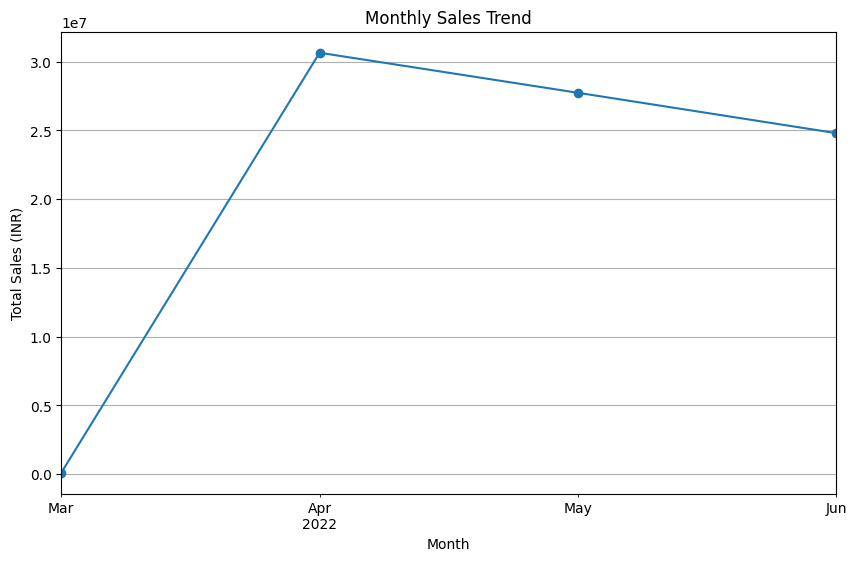

In [ ]:
# Group sales by month
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum()

# Plot monthly sales trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.ylabel('Total Sales (INR)')
plt.xlabel('Month')
plt.grid()
plt.show()


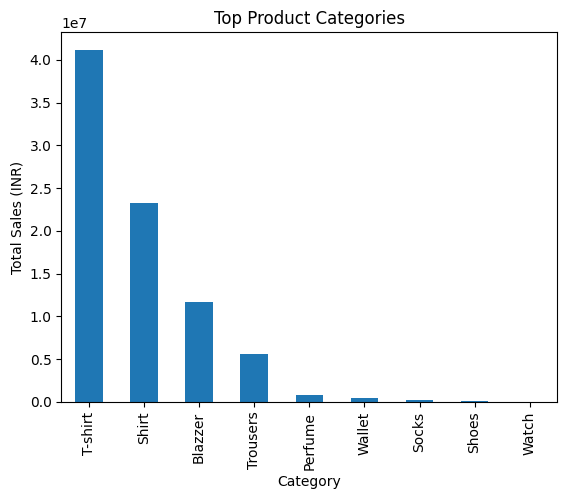

In [ ]:
# Top categories
top_categories = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)

# Plot top categories
top_categories.plot(kind='bar', title='Top Product Categories')
plt.ylabel('Total Sales (INR)')
plt.xlabel('Category')
plt.show()


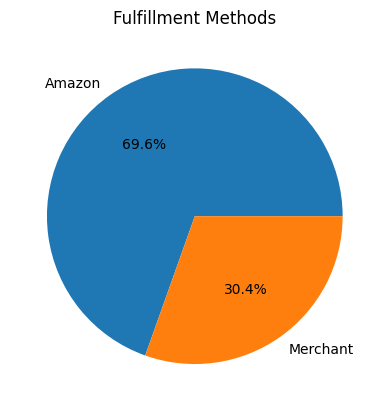

In [ ]:
fulfillment_stats = df['Fulfilment'].value_counts()

# Pie chart for fulfillment methods
fulfillment_stats.plot(kind='pie', autopct='%1.1f%%', title='Fulfillment Methods')
plt.ylabel('')
plt.show()


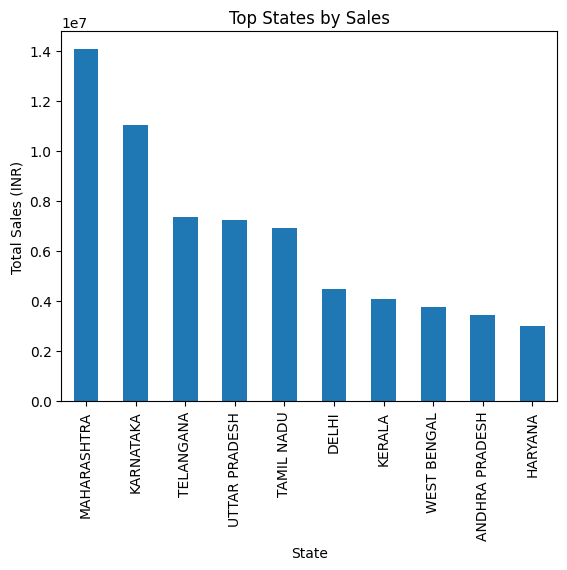

In [ ]:
# Sales by state
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

# Top 10 states by sales
state_sales.head(10).plot(kind='bar', title='Top States by Sales')
plt.ylabel('Total Sales (INR)')
plt.xlabel('State')
plt.show()


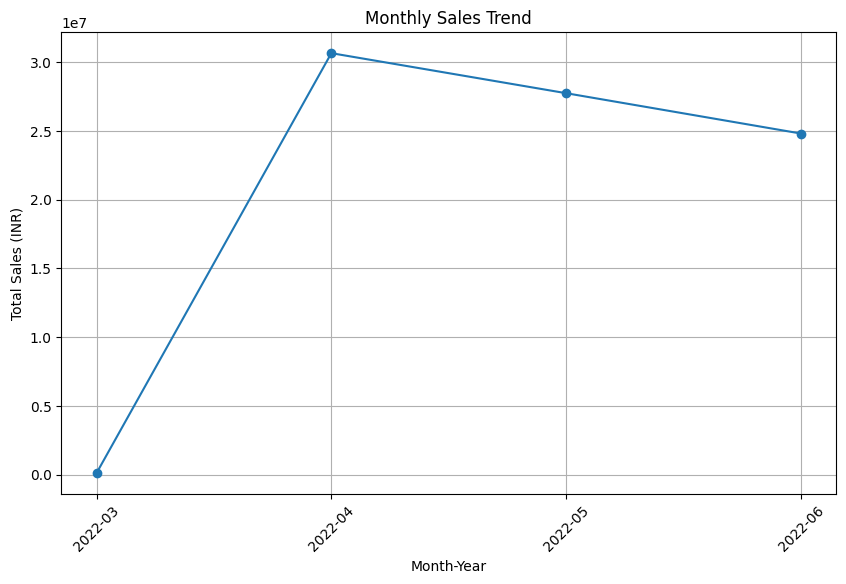

In [ ]:
df['YearMonth'] = df['Date'].dt.to_period('M')
sales_trend = df.groupby('YearMonth')['Amount'].sum().reset_index()

# Visualize the trend
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(sales_trend['YearMonth'].astype(str), sales_trend['Amount'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<Axes: title={'center': 'Sales Status Distribution'}, xlabel='Status'>

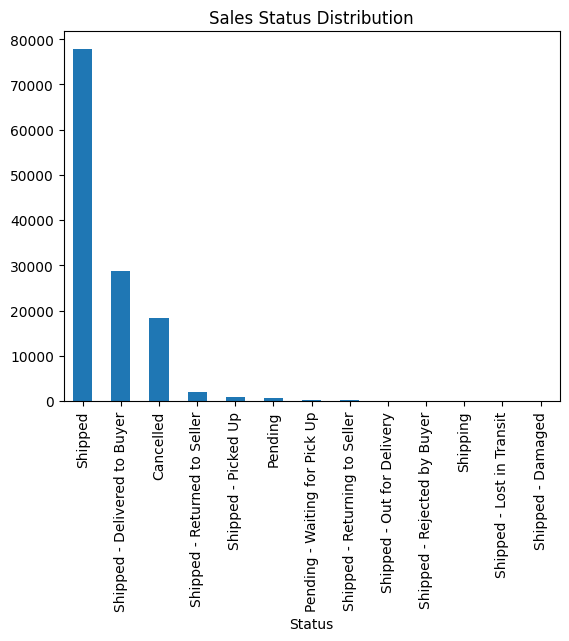

In [ ]:
status_distribution = df['Status'].value_counts()
status_distribution.plot(kind='bar', title='Sales Status Distribution')


In [ ]:
category_sales = df.groupby('Category')['Amount'].sum().reset_index()
size_sales = df.groupby('Size')['Qty'].sum().reset_index()


<Axes: title={'center': 'Quantity Sold by Size'}, xlabel='Size'>

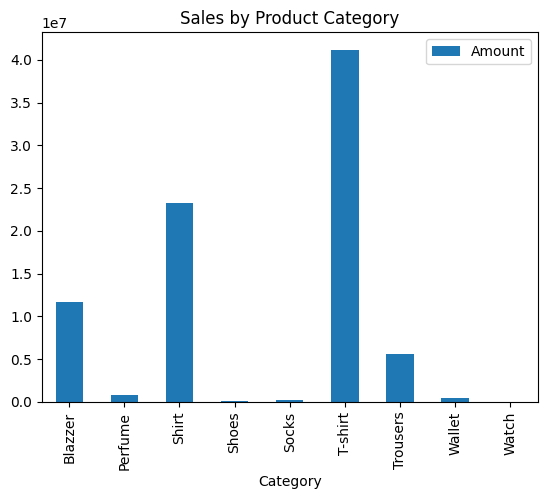

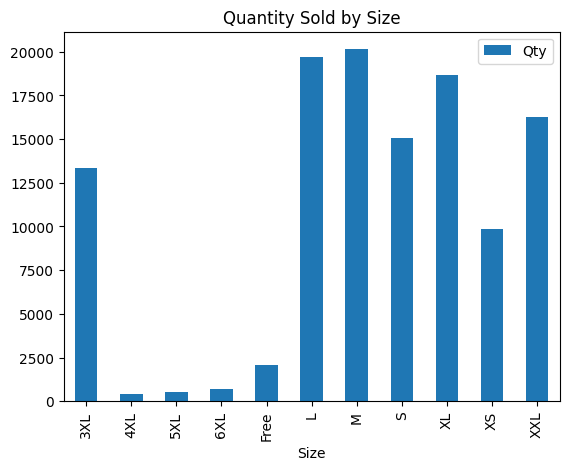

In [ ]:
category_sales.plot(kind='bar', x='Category', y='Amount', title='Sales by Product Category')
size_sales.plot(kind='bar', x='Size', y='Qty', title='Quantity Sold by Size')


In [ ]:
product_quantity = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)
fulfillment_effectiveness = pd.crosstab(df['Fulfilment'], df['Status'])
print(fulfillment_effectiveness)


Status      Cancelled  Pending  Pending - Waiting for Pick Up  Shipped  \
Fulfilment                                                               
Amazon          11475      415                              0    77815   
Merchant         6859      243                            281        0   

Status      Shipped - Damaged  Shipped - Delivered to Buyer  \
Fulfilment                                                    
Amazon                      0                             0   
Merchant                    1                         28756   

Status      Shipped - Lost in Transit  Shipped - Out for Delivery  \
Fulfilment                                                          
Amazon                              0                           0   
Merchant                            5                          35   

Status      Shipped - Picked Up  Shipped - Rejected by Buyer  \
Fulfilment                                                     
Amazon                        0              

In [ ]:
success_rate = fulfillment_effectiveness.div(fulfillment_effectiveness.sum(axis=1), axis=0)


<Axes: title={'center': 'Fulfillment Method Effectiveness'}, xlabel='Fulfilment'>

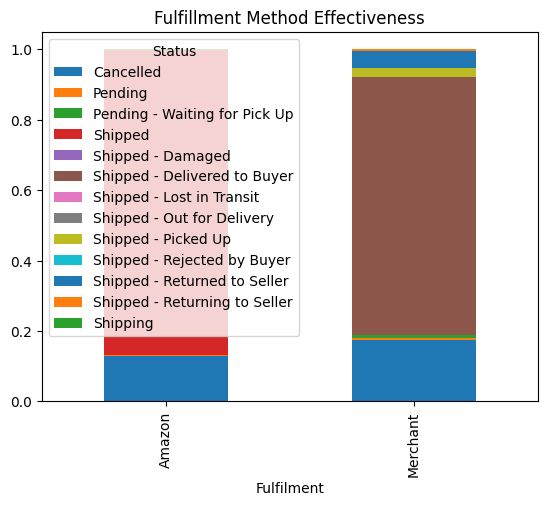

In [ ]:
success_rate.plot(kind='bar', stacked=True, title='Fulfillment Method Effectiveness')
